In [1]:
import sys,os

data_path = os.getcwd()

try:
    import localgraphclustering as lgc
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    import localgraphclustering as lgc

In [2]:
import time
import numpy as np

import matplotlib.pyplot as plt

# Load graph

In [3]:
# Read graph. This also supports gml format.
#g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/usr/local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:203: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



# Nodes embedding via fiedler vector

In [4]:
# Call the global spectral partitioning algorithm.
output_sp = lgc.fiedler(g)
print(output_sp)
output_sp = lgc.fiedler(g,normalize=False)
print(output_sp)

(array([[-0.00042053],
       [ 0.00342669],
       [-0.0006336 ],
       ...,
       [-0.00067973],
       [-0.00013837],
       [-0.00065656]]), array([-1.27346970e-16,  1.25784929e-01]))
(array([[ 0.00409879],
       [-0.02398684],
       [ 0.0072242 ],
       ...,
       [ 0.00709655],
       [ 0.00057053],
       [ 0.00553227]]), array([5.06799505e-16, 1.25784929e-01]))


# Nodes embedding via PageRank vector

In [5]:
ref_node = [3215]
# L1-regularized PageRank solver.
output_acl = lgc.approximate_PageRank(g,ref_node)
print(output_acl)
output_acl = lgc.approximate_PageRank(g,ref_node,cpp = False)
print(output_acl)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg")
print(output_l1reg)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg",cpp = False)
print(output_l1reg)
output_weighted = lgc.approximate_PageRank_weighted(g,ref_node)
print(output_weighted) 
output_nibble = lgc.PageRank_nibble(g,ref_node)
print(output_nibble) 
output_nibble = lgc.PageRank_nibble(g,ref_node,cpp=False)
print(output_nibble) 

(array([3215, 1496, 4581, ..., 3590, 2574, 1736], dtype=uint32), array([3.37931666e-03, 3.10299222e-05, 5.36460835e-05, ...,
       1.51078322e-07, 1.50084578e-07, 1.50049014e-07]))
[1.09052229e-04 2.55015005e-03 4.59018251e-05 ... 0.00000000e+00
 2.15758562e-05 0.00000000e+00]
(array([   0,    1,    2, ..., 5151, 5152, 5155], dtype=uint32), array([8.39839254e-07, 5.18026944e-05, 1.38949547e-07, ...,
       1.69975425e-06, 8.27073826e-08, 9.54671536e-07]))
(array([   0,    1,    2, ..., 5151, 5152, 5155], dtype=uint32), array([8.39839254e-07, 5.18026944e-05, 1.38949547e-07, ...,
       1.69975425e-06, 8.27073826e-08, 9.54671536e-07]))
[1.09052229e-04 2.55015005e-03 4.59018251e-05 ... 0.00000000e+00
 2.15758562e-05 0.00000000e+00]
(array([3215, 1496, 4581, ..., 5131, 4372, 4494], dtype=uint32), array([2.72248483e-06, 4.07024770e-08, 6.95214937e-08, ...,
       7.19038559e-10, 7.03889135e-10, 6.86930403e-10]))
[6.49036546e-08 2.74856813e-06 0.00000000e+00 ... 0.00000000e+00
 2.40159361e-

# Rounding algorithms

In [6]:
output_sc = lgc.sweep_cut(g,output_acl)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,cpp=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg)
print(output_sc)

[array([3215, 1496, 4581, ..., 1667, 5128, 3414], dtype=uint32), 0.36393266859654766]


/usr/local/lib/python3.6/site-packages/localgraphclustering/sweep_cut.py:79: UserWarning:

Input will be converted to a dense vector, set "cpp" to be True for better performance



[[3215, 2793, 945, 1972, 454, 1608, 767, 1399, 2991, 2397, 2786, 986, 1952, 4249, 1740, 236, 2865, 4749, 2830, 175, 1625, 5150, 4581, 2406, 1, 4493, 4460, 4920, 992, 4811, 4062, 226, 2803, 3661, 823, 4926, 2689, 4984, 3209, 932, 1929, 1535, 433, 3715, 1496, 1073, 3405, 2033, 1301, 1603, 1980, 170, 4467, 2918, 1865, 4505, 1236, 1044, 670, 1114, 1355, 3791, 3861, 3398, 2105, 2663, 4910, 4346, 4476, 334, 1647, 2638, 2065, 487, 2235, 1116, 3100, 4410, 964, 867, 916, 3892, 2804, 1307, 4649, 1311, 2906, 1194, 3308, 62, 4878, 1567, 2930, 411, 343, 3736, 1212, 3211, 5052, 262, 697, 1938, 2841, 4992, 1097, 725, 1793, 2120, 5144, 2597, 852, 1235, 4178, 2154, 3135, 2773, 2438, 1366, 3478, 1513, 3523, 159, 4384, 2835, 377, 3992, 4922, 2123, 2620, 2775, 4336, 4253, 577, 2330, 64, 542, 77, 4306, 452, 2413, 2750, 2532, 2389, 2678, 576, 2467, 1009, 4033, 1152, 2012, 1861, 3664, 1011, 995, 3869, 2430, 2993, 379, 3599, 2015, 2798, 607, 2585, 3511, 3324, 3310, 2147, 629, 3188, 3106, 3277, 2814, 1041, 501

# Spectral local graph partitioning methods

In [7]:
ref_node = [3215]

# Find a cluster using approximate PageRank.
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl_weighted",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="l1reg")
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))

[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 2793,  945, ..., 3197, 1522, 2256], dtype=uint32), 0.3339125957392032]
0.3339125957392032


# Flow-based local graph partitioning methods

In [8]:
ref_node = [3215]
output_crd = lgc.flow_clustering(g,ref_node,method="crd")
print(output_crd)

[array([2378,  594, 3632, ..., 5155, 3244, 3222], dtype=uint32), 0.3555393477884639]


In [9]:
G = lgc.GraphLocal(os.path.join(data_path,'datasets/minnesota.edgelist'),'edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_mqi = lgc.flow_clustering(G,ref_node,method="mqi")
print(output_mqi)
print(G.compute_conductance(output_mqi[0],cpp=False))
output_sl = lgc.flow_clustering(G,ref_node,method="sl")
print(output_sl)
print(G.compute_conductance(output_sl[0],cpp=False))

/usr/local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.

/usr/local/lib/python3.6/site-packages/localgraphclustering/flow_clustering.py:52: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



[array([195, 192, 191, 188, 187, 180, 178, 177, 176, 171, 169, 164, 158,
       152, 151, 149, 145, 144, 143, 142, 141, 139, 132, 131, 130, 129,
       128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 102, 100,  95,
        94,  93,  92,  91,  90,  89,  88,  85,  84,  83,  82,  81,  80,
        79,  78,  77,  76,  75,  74,  73,  71,  70,  69,  68,  67,  65,
        64,  63,  62,  61,  60,  59, 254,  57, 253,  56,  55,  54,  53,
       249,  52, 248,  51, 247,  50, 246,  49, 245,  48, 244,  47,  46,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36, 232,  35, 231,
        34,  33,  32, 228,  31, 227,  30, 226,  29, 225,  28,  27, 223,
        26,  25,  24,  23, 219,  22,  21, 217,  20,  19, 215,  18,  17,
        16, 212,  15, 211,  14, 210,  13, 209,  12, 208,  11,  10,   9,
         8,   7,   6,   5,   4,   3,  99,   2,  98,   1,   0],
      dtype=uint32), 0.03664921465968586]
0.03664921465968586
[array([111, 194, 170, 116, 110, 113, 184, 167,   3,   0,   7,   5,   4,
         

# Example for multiclass label prediction

In [10]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

output_mc=lgc.multiclass_label_prediction(g,labels=labels)

/usr/local/lib/python3.6/site-packages/localgraphclustering/GraphLocal.py:203: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



In [11]:
print(output_mc)

[[array([1.66015234e-05, 8.88344829e-02, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([7.97847291e-05, 2.53833203e-03, 1.80634411e-05, ...,
       0.00000000e+00, 1.62294161e-05, 0.00000000e+00]), array([1.55750004e-04, 1.96251451e-04, 0.00000000e+00, ...,
       0.00000000e+00, 1.74754008e-05, 1.65488792e-05])], [array([2236,    0, 3836, ..., 3830, 4599, 5156]), array([ 794,   76, 1843, ..., 3088, 1909, 5156]), array([ 477,  398, 3467, ..., 3468, 1746, 1782])], [2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0

# Densest subgraph 

In [12]:
#How to use densest subgraph method.
g = lgc.GraphLocal(os.path.join(data_path,'datasets/Erdos02-cc.edgelist'),'edgelist',' ')
lgc.densest_subgraph(g)

[4.971153846153846,
 array([   3,    4,    5,    7,   27,   30,   33,   37,   45,   54,   57,
          68,   70,   81,  105,  113,  121,  150,  154,  156,  162,  163,
         171,  174,  175,  176,  178,  181,  185,  193,  201,  208,  225,
         244,  248,  252,  255,  256,  259,  262,  265,  266,  269,  272,
         273,  280,  282,  285,  287,  294,  302,  305,  309,  314,  322,
         333,  335,  337,  347,  358,  373,  378,  379,  396,  397,  398,
         405,  406,  411,  416,  425,  433,  435,  449,  452,  454,  457,
         465,  470,  474,  490,  493,  778, 1340, 1489, 2039, 2452, 2797,
        2845, 3392, 3692, 3754, 3760, 4067, 4416, 4795, 4875, 5012, 5060,
        5079, 5170, 5464, 5519, 5533], dtype=uint32)]

# Network Community Profile

In [13]:
G = lgc.GraphLocal(os.path.join(data_path,"datasets/Erdos02-cc.edgelist"),file_type = "edgelist", separator = " ", header = False)
ncp_instance = lgc.NCPData(G)
ncp_instance.approxPageRank(ratio=0.1,nthreads=4)

There are  1  connected components in the graph


In [14]:
ncp_instance.crd(ratio=0.01,w=10,U=10,h=1000,nthreads=4)

In [15]:
ncp_instance.mqi(ratio=0.1,nthreads=4)

In [16]:
ncp_instance.l1reg(ratio=0.1,nthreads=4)

## Plot NCP with CRD

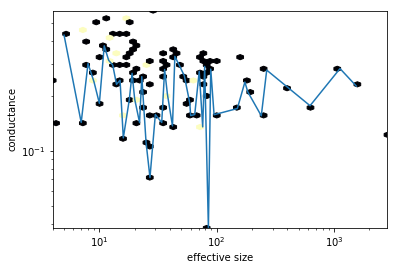

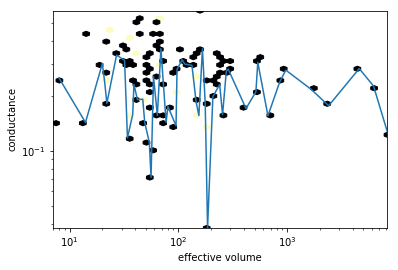

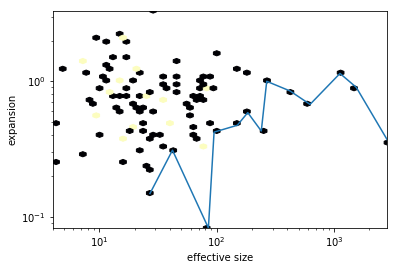

In [17]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "crd")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with MQI

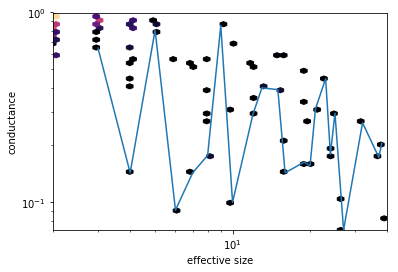

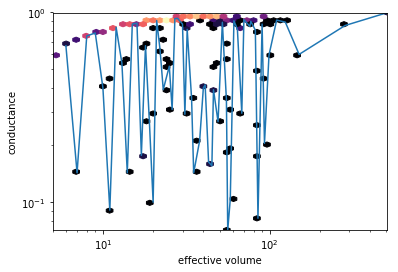

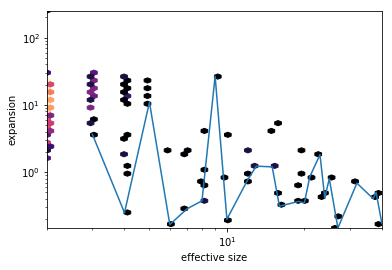

In [18]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "mqi")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with l1reg

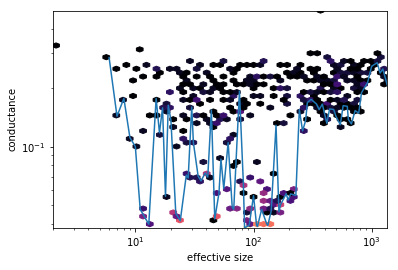

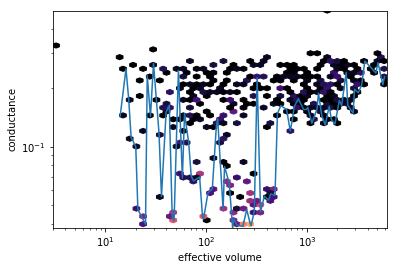

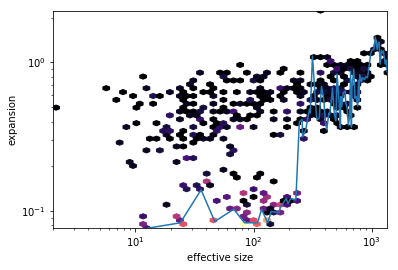

In [19]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "l1reg")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with acl

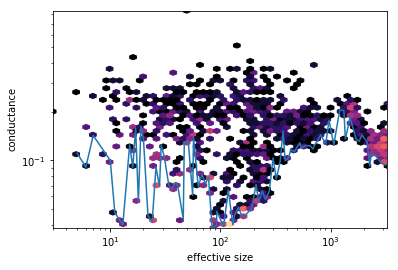

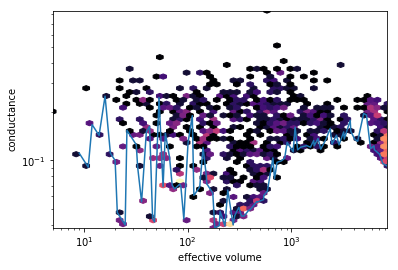

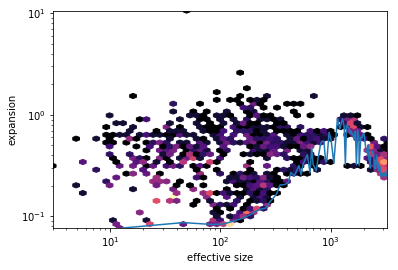

In [20]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with selected rows

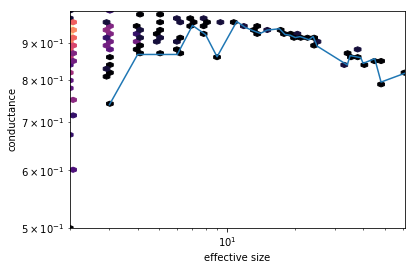

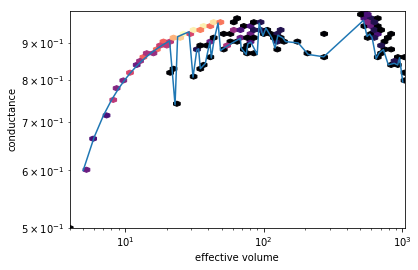

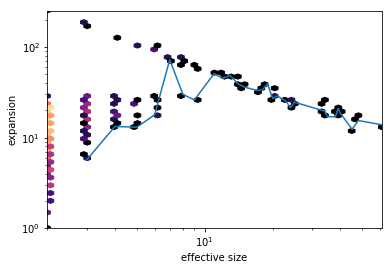

In [21]:
ncp_plots = lgc.NCPPlots(ncp_instance,selected_rows = range(500))
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Check ncp results as a data frame

In [22]:
ncp_instance.as_data_frame()

,input_isop,input_cond,input_edgeseff,input_edgestrue,input_sizeeff,input_sizetrue,input_voleff,input_cut,input_voltrue,output_isop,...,output_sizeeff,output_sizetrue,output_voleff,output_cut,output_voltrue,methodfunc,input_set_type,input_set_params,time,method
0,13.000000,0.928571,2.0,2.0,2,2,28.0,26.0,28.0,13.000000,...,2,2,28.0,26.0,28.0,<function _evaluate_set at 0x118334f28>,neighborhood,987,3.099442e-06,neighborhoods
1,10.000000,0.909091,2.0,2.0,2,2,22.0,20.0,22.0,10.000000,...,2,2,22.0,20.0,22.0,<function _evaluate_set at 0x118334f28>,neighborhood,5511,2.861023e-06,neighborhoods
2,12.000000,0.923077,2.0,2.0,2,2,26.0,24.0,26.0,12.000000,...,2,2,26.0,24.0,26.0,<function _evaluate_set at 0x118334f28>,neighborhood,2960,9.536743e-07,neighborhoods
3,16.000000,0.941176,2.0,2.0,2,2,34.0,32.0,34.0,16.000000,...,2,2,34.0,32.0,34.0,<function _evaluate_set at 0x118334f28>,neighborhood,4037,1.192093e-06,neighborhoods
4,109.000000,0.964602,20.0,20.0,5,5,565.0,545.0,565.0,109.000000,...,5,5,565.0,545.0,565.0,<function _evaluate_set at 0x118334f28>,neighborhood,392,6.198883e-06,neighborhoods
5,11.000000,0.916667,2.0,2.0,2,2,24.0,22.0,24.0,11.000000,...,2,2,24.0,22.0,24.0,<function _evaluate_set at 0x118334f28>,neighborhood,5121,9.536743e-07,neighborhoods
6,14.500000,0.935484,2.0,2.0,2,2,31.0,29.0,31.0,14.500000,...,2,2,31.0,29.0,31.0,<function _evaluate_set at 0x118334f28>,neighborhood,4966,3.099442e-06,neighborhoods
7,21.500000,0.955556,2.0,2.0,2,2,45.0,43.0,45.0,21.500000,...,2,2,45.0,43.0,45.0,<function _evaluate_set at 0x118334f28>,neighborhood,2229,2.145767e-06,neighborhoods
8,21.000000,0.913043,12.0,12.0,6,6,138.0,126.0,138.0,21.000000,...,6,6,138.0,126.0,138.0,<function _evaluate_set at 0x118334f28>,neighborhood,1008,2.145767e-06,neighborhoods
9,19.666667,0.936508,4.0,4.0,3,3,63.0,59.0,63.0,19.666667,...,3,3,63.0,59.0,63.0,<function _evaluate_set at 0x118334f28>,neighborhood,825,1.907349e-06,neighborhoods


In [23]:
help(ncp_instance)

Help on NCPData in module localgraphclustering.ncp object:

class NCPData(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, graph, setfuncs=[], input_stats=True, do_largest_component=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_fiedler(self)
 |  
 |  add_fiedler_mqi(self)
 |  
 |  add_localmin_samples(self, feature=None, strict=True, ratio=1.0, mindegree=5, neighborhoods=True, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_neighborhoods(self, **kwargs)
 |  
 |  add_random_neighborhood_samples(self, ratio=0.3, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_random_node_samples(self, ratio=0.3, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_set_samples(self, sets, nthreads=4, method=None, methodname=None, timeout=1000)
 |  
 |  approxPageRank(self, gamma:float=0.010101010101010102, rholist:List[float]=[1e-05, 0.0001], localmins:bool=True, localmin_ratio:float=0.5

## Extract a specific NCP result

In [24]:
#Get the first ncp result corresponding to the first row of the data frame above
print(ncp_instance.output_set(0))

#Get the second result corresponding to the second row of the data frame above
print(ncp_instance.output_set(9))

([158, 987], None)
([83, 145, 825], None)


## Clustering metrics for vertex neighborhood

In [25]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/dolphins.smat'),separator = ' ')
help(lgc.triangleclusters)
cond,cut,vol,cc,t = lgc.triangleclusters(g)

Help on function triangleclusters in module localgraphclustering.triangleclusters:

triangleclusters(G)
    TRIANGLECLUSTERS Clustering metrics for clusters of vertex neighborhoods.
    This function studies clusters which are given by vertex neighborhoods.
    Let v be a vertex in a graph, then the cluster associated with v is just
    the set of all neighbors of v and v itself.  We return the clustering
    metrics associated with these clusters for all vertices in the graph.
    
    Parameters
    ----------
    
    G: GraphLocal
    
    Returns
    -------
    
    cond: Sequence[float]
        conductance of each cluster of a vertex neighborhood
    
    cut: Sequence[float]
        cut of each cluster
    
    vol: Sequence[float]
        volume of each cluster
    
    cc: Sequence[float]
        clustering coefficient of each vertex
    
    t: Sequence[float]
        number of triangles centered at each vertex



## Find extrema in a graph based on neighborhoods.

In [26]:
help(lgc.neighborhoodmin)
minverts, minvals = lgc.neighborhoodmin(g,cond,True)

Help on function neighborhoodmin in module localgraphclustering.neighborhoodmin:

neighborhoodmin(G, vals, strict)
    Find extrema in a graph based on neighborhoods.
    Parameters
    ----------
    G: GraphLocal
    vals: Sequence[float]
        features of neighborhoods used to compare against each other, i.e. conductance
    strict: bool
        If True, find a set of vertices where vals(i) < vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
        If False, find a set of vertices where vals(i) <= vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
    Returns
    -------
    minverts: Sequence[int]
        the set of vertices
    minvals: Sequence[float]
        the set of min values

